### leetcode-problem-dataset

I found this dataset on Kaggle (https://www.kaggle.com/datasets/gzipchrist/leetcode-problem-dataset).

The author claims that it contains data about 1825 problems from the leetcode.com website.

In [11]:
# Download data
import opendatasets as od
# od.download("https://www.kaggle.com/datasets/gzipchrist/leetcode-problem-dataset")

At first glance, it appears to contain just normal problems from the service.

Here is an example of one problem:

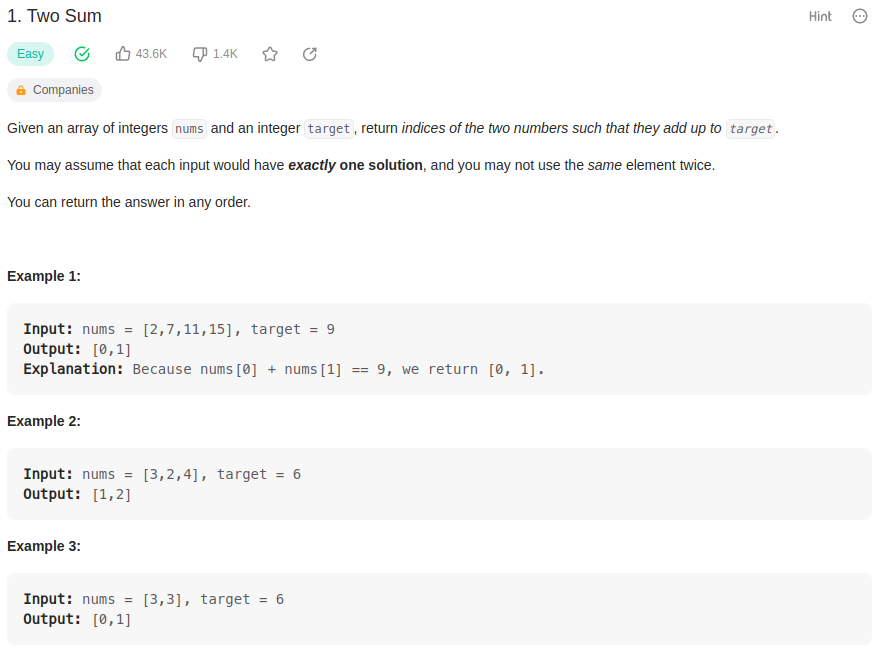


In [12]:
import pandas as pd

# Path of the file to read
data_file_path = 'leetcode-problem-dataset/leetcode_dataset - lc.csv'

# Fill in the line below to read the file into a variable leetcode_data
leetcode_data = pd.read_csv(data_file_path, index_col='id')

And here are the first 5 elements of the dataset using Pandas:

In [13]:
# fist 5 elements of the dataset
leetcode_data.head()

,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
id,,,,,,,,,,,,,,,,,,
1,Two Sum,Given an array of integers `nums` and an integ...,0,Easy,/articles/two-sum,46.7,100.0,https://leetcode.com/problems/two-sum,999,4.1M,8.7M,"Amazon,Google,Apple,Adobe,Microsoft,Bloomberg,...","Array,Hash Table",20217,712,97,1,"[3Sum, /problems/3sum/, Medium], [4Sum, /probl..."
2,Add Two Numbers,You are given two non-empty linked lists repre...,0,Medium,/articles/add-two-numbers,35.7,93.1,https://leetcode.com/problems/add-two-numbers,999,1.9M,5.2M,"Bloomberg,Microsoft,Amazon,Google,Facebook,App...","Linked List,Math,Recursion",11350,2704,81,1,"[Multiply Strings, /problems/multiply-strings/..."
3,Longest Substring Without Repeating Characters,"Given a string `s`, find the length of the lon...",0,Medium,/articles/longest-substring-without-repeating-...,31.5,90.9,https://leetcode.com/problems/longest-substrin...,999,2.1M,6.7M,"Amazon,Bloomberg,Microsoft,Facebook,Apple,Adob...","Hash Table,Two Pointers,String,Sliding Window",13810,714,95,1,[Longest Substring with At Most Two Distinct C...
4,Median of Two Sorted Arrays,Given two sorted arrays `nums1` and `nums2` of...,0,Hard,/articles/median-of-two-sorted-arrays,31.4,86.2,https://leetcode.com/problems/median-of-two-so...,999,904.7K,2.9M,"Amazon,Goldman Sachs,Facebook,Microsoft,Apple,...","Array,Binary Search,Divide and Conquer",9665,1486,87,1,NaN
5,Longest Palindromic Substring,"Given a string `s`, return the longest palindr...",0,Medium,/articles/longest-palindromic-substring,30.6,84.7,https://leetcode.com/problems/longest-palindro...,999,1.3M,4.1M,"Amazon,Microsoft,Wayfair,Facebook,Adobe,eBay,G...","String,Dynamic Programming",10271,670,94,1,"[Shortest Palindrome, /problems/shortest-palin..."


In [14]:
# Check the number of rows and columns
leetcode_data.shape

(1825, 18)

According to Pandas, the dataset has a shape of (1825, 19), indicating that it contains 1825 rows or observations and 19 columns. 

Here is some additional information about the columns:

| Column name       | Column description                                                                   |
|-------------------|--------------------------------------------------------------------------------------|
| id                | problem id                                                                           |
| title             | problem name                                                                         |
| description       | problem description                                                                  |
| is_premium        | whether the question requires a premium account                                      |
| difficulty        | the difficulty of the problem                                                        |
| solution_link     | url to solution                                                                      |
| acceptance_rate   | how often the answer submitted is correct                                            |
| frequency         | how often the problem is attempted                                                   |
| url               | url to the problem                                                                   |
| discuss_count     | how many comments are submitted by users                                             |
| accepted          | how many times the answer was accepted                                               |
| submissions       | how many times the answer was submitted                                              |
| companies         | which companies were tagged as having asked this specific problem                    |
| related_topics    | related topics to the current problem                                                |
| likes             | how many likes the problem got                                                       |
| dislikes          | how many dislikes the problem got                                                    |
| rating            | likes / (likes + dislikes)                                                           |
| asked_by_faang    | whether or not the question was asked by facebook, apple, amazon, google, or netflix |
| similar_questions | similar problems with problem name, slug, and difficulty                             |

Before we continue, I would like to give a short plan for data exploration:

    1. Check the data types of the columns.
    2. Obtain summary statistics for the numeric values.
    3. Check for missing values.
    4. Analyze descriptive statistics and data distribution.
    5. Key findings and Insights.
    6. Formulate hypotheses.
    7. Test the significance of the hypotheses.

In [15]:
# Using the info() method, we can take a look at the types of data:
leetcode_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825 entries, 1 to 1825
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1825 non-null   object 
 1   description        1825 non-null   object 
 2   is_premium         1825 non-null   int64  
 3   difficulty         1825 non-null   object 
 4   solution_link      987 non-null    object 
 5   acceptance_rate    1825 non-null   float64
 6   frequency          1825 non-null   float64
 7   url                1825 non-null   object 
 8   discuss_count      1825 non-null   int64  
 9   accepted           1825 non-null   object 
 10  submissions        1825 non-null   object 
 11  companies          1749 non-null   object 
 12  related_topics     1571 non-null   object 
 13  likes              1825 non-null   int64  
 14  dislikes           1825 non-null   int64  
 15  rating             1825 non-null   int64  
 16  asked_by_faang     1825 

As we can see from the screenshot above, the dataset has 9 numeric values.

However, some of them (is_premium and asked_by_faang) are categorical (binary).

Another example of categorical data is 'difficulty', which has only 3 possible values: easy, medium, and hard.

In [16]:
# Print summary statistics
leetcode_data.describe()

,is_premium,acceptance_rate,frequency,discuss_count,likes,dislikes,rating,asked_by_faang
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,0.218082,53.139616,21.113041,421.435068,1050.534795,279.010959,77.391233,0.671233
std,0.413057,14.778411,22.364741,330.583617,1512.674013,608.489206,23.317515,0.469894
min,0.000000,13.900000,0.000000,9.000000,2.000000,0.000000,7.000000,0.000000
25%,0.000000,42.400000,3.100000,150.000000,217.000000,32.000000,67.000000,0.000000
50%,0.000000,51.600000,13.500000,292.000000,516.000000,92.000000,88.000000,1.000000
75%,0.000000,62.800000,31.800000,663.000000,1200.000000,239.000000,95.000000,1.000000
max,1.000000,95.600000,100.000000,999.000000,20217.000000,8900.000000,100.000000,1.000000


From this, we can already gain some insights:

1. More than 75% of problems can be solved without a premium subscription.

2. Nearly 50% of problems are used in the interview process at companies like Meta (Facebook), Apple, Amazon, Google, and Netflix.


We will discuss it later.





As we can see from the last picture, the dataset has no missing values, at least for numeric values. 

In [17]:
leetcode_data.isnull().sum()

title                   0
description             0
is_premium              0
difficulty              0
solution_link         838
acceptance_rate         0
frequency               0
url                     0
discuss_count           0
accepted                0
submissions             0
companies              76
related_topics        254
likes                   0
dislikes                0
rating                  0
asked_by_faang          0
similar_questions    1080
dtype: int64

As we can see, we have some missing values. I am unsure if these values could somehow affect this task, except if we were to do machine learning for company prediction. 

In such cases, records with empty values should be deleted.

**If we assume that the data is fine, we can observe that almost 50% of the problems do not have an official solution.**

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

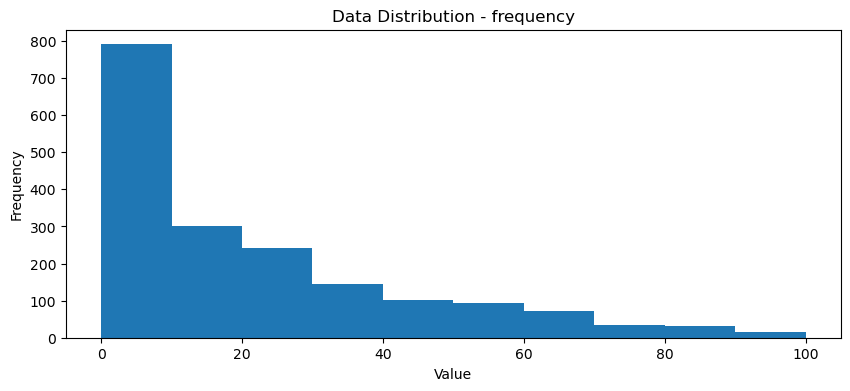

In [47]:
# Get the variable to examine
var_data = leetcode_data['frequency']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution - frequency')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
plt.show()

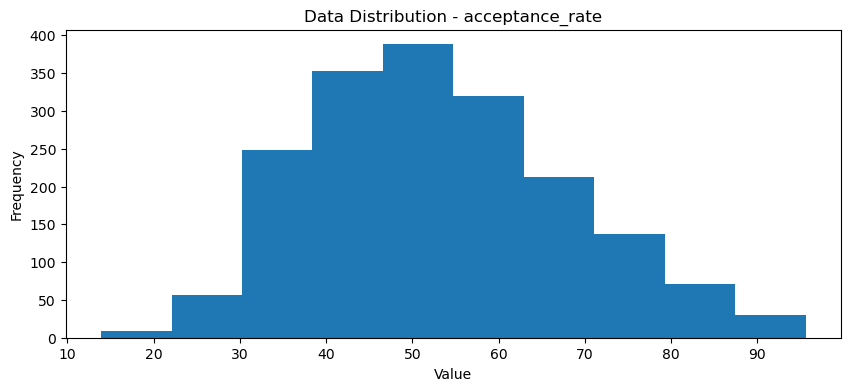

In [48]:
# Get the variable to examine
var_data = leetcode_data['acceptance_rate']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add titles and labels
plt.title('Data Distribution - acceptance_rate')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
plt.show()

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

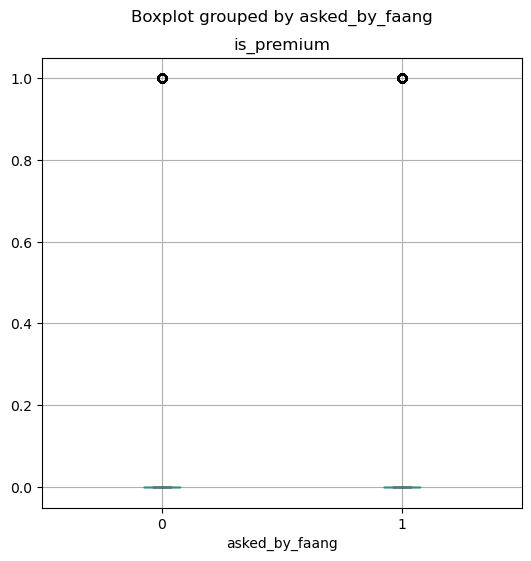

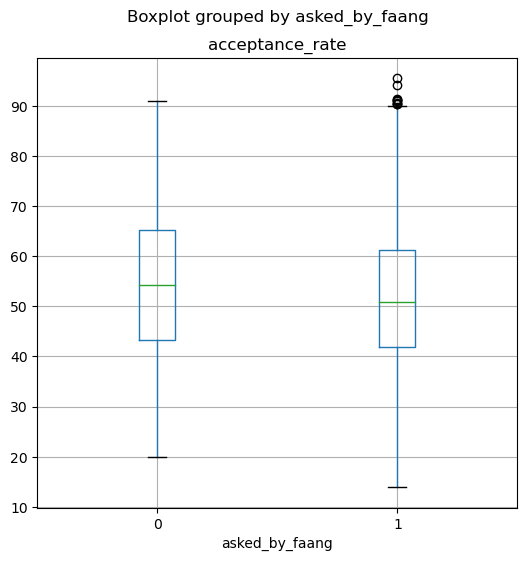

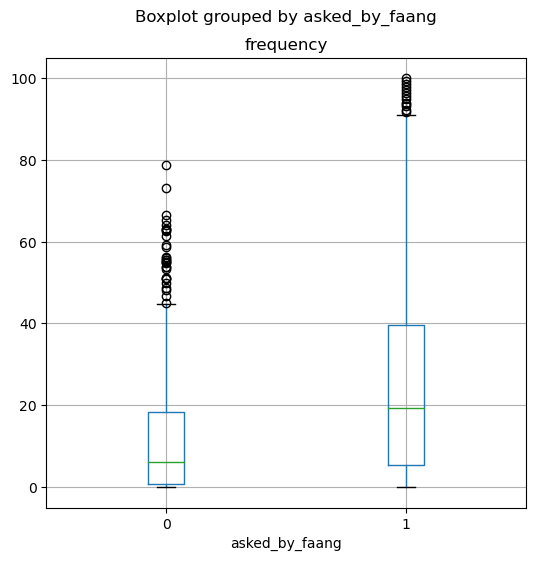

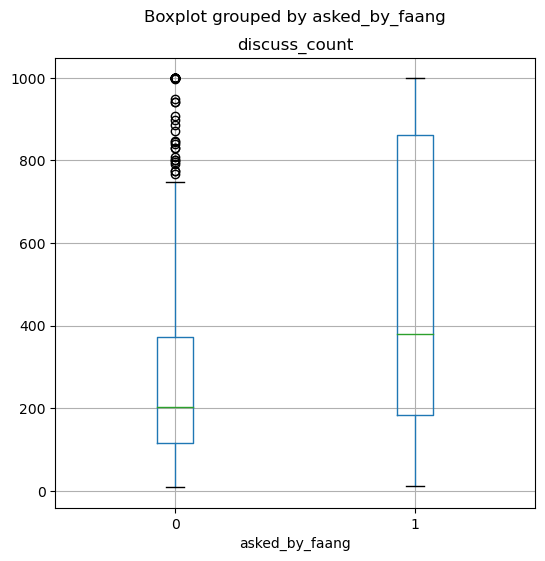

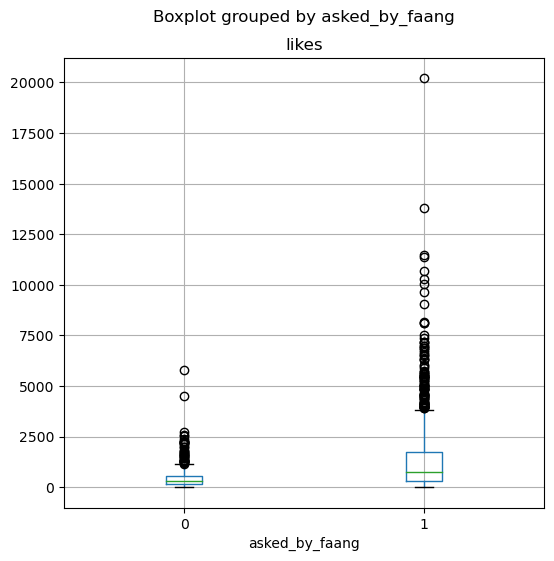

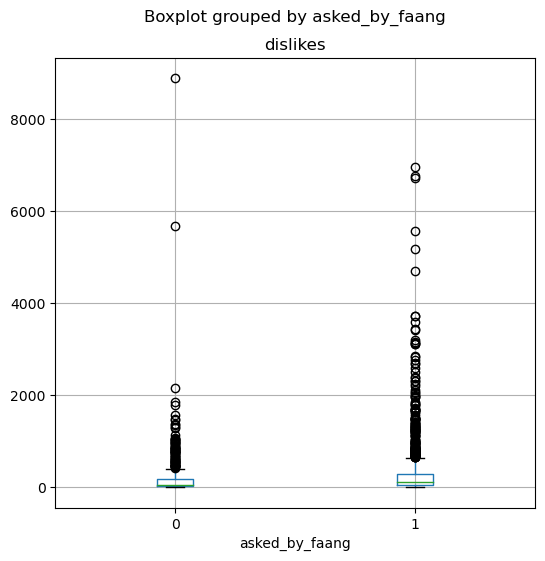

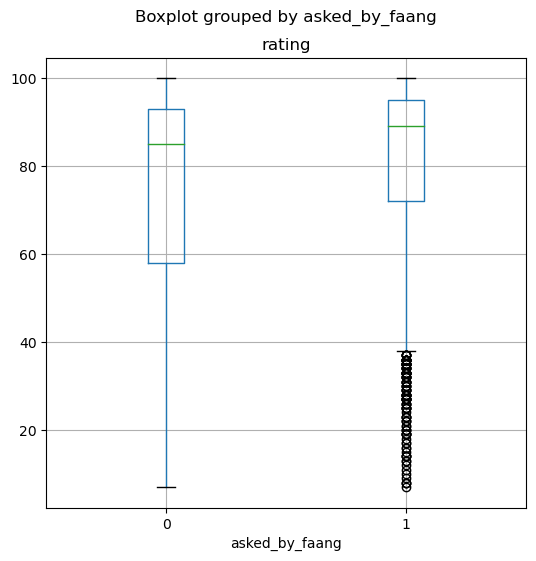

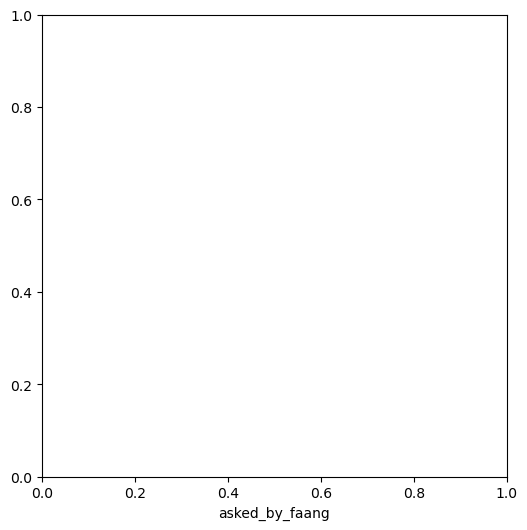

In [49]:
features = ['is_premium',	'acceptance_rate',	'frequency',	'discuss_count',	'likes',	'dislikes',	'rating',	'difficulty']
for col in features:
    leetcode_data.boxplot(column=col, by='asked_by_faang', figsize=(6,6))
    plt.title(col)
plt.show()

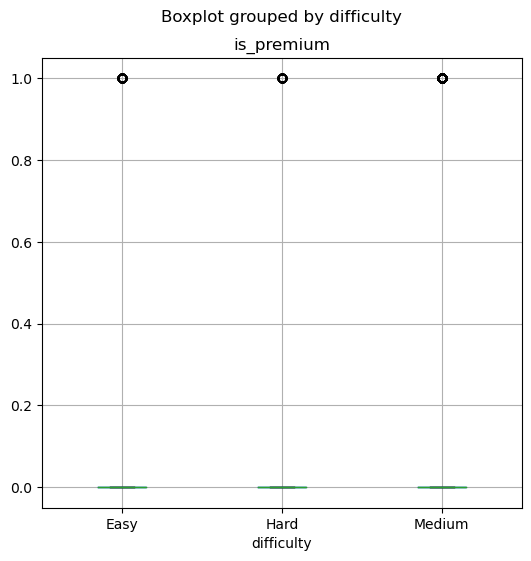

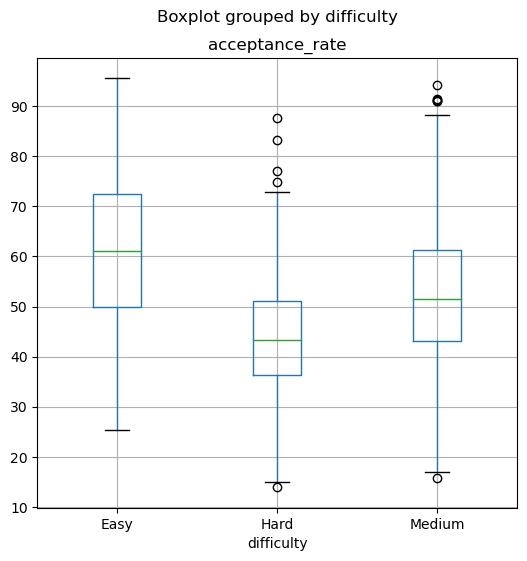

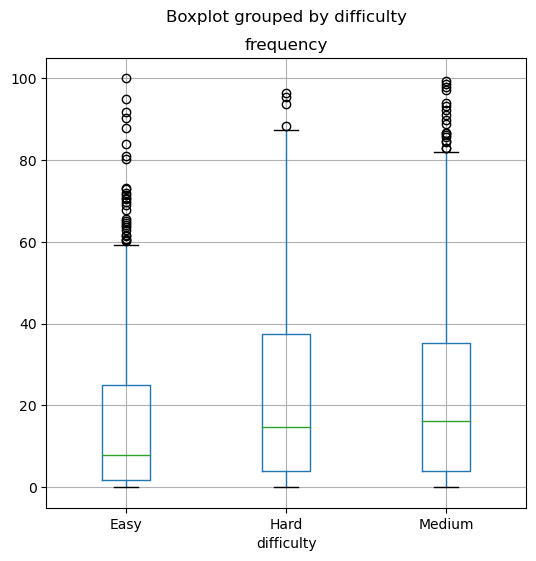

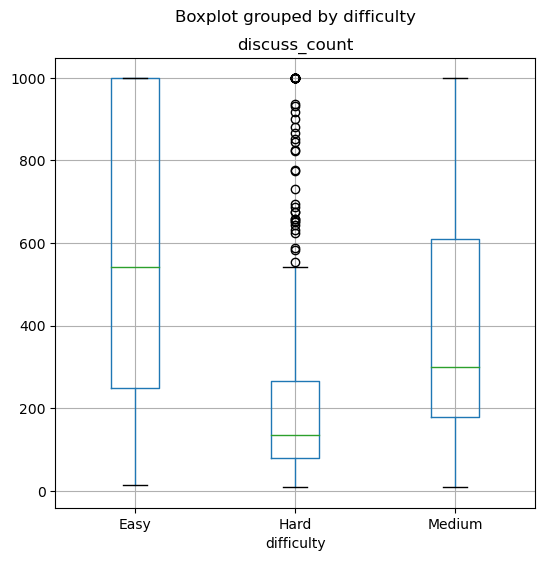

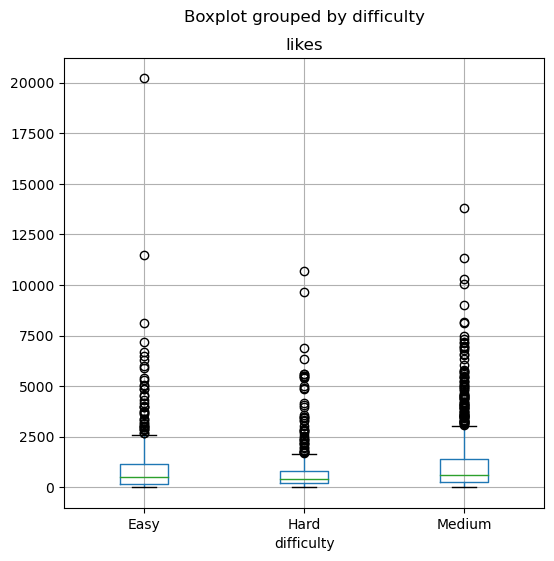

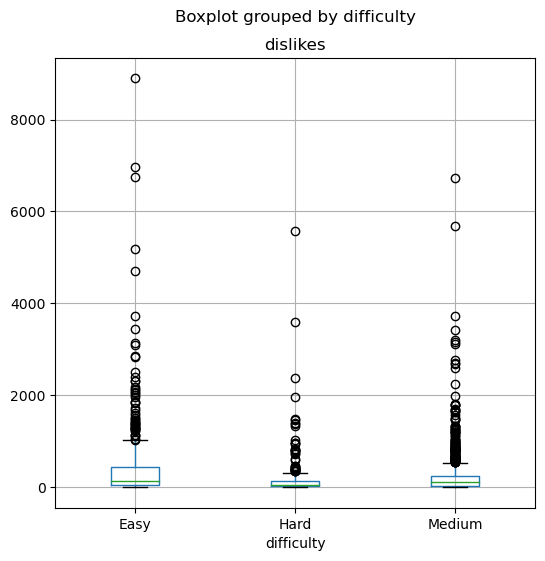

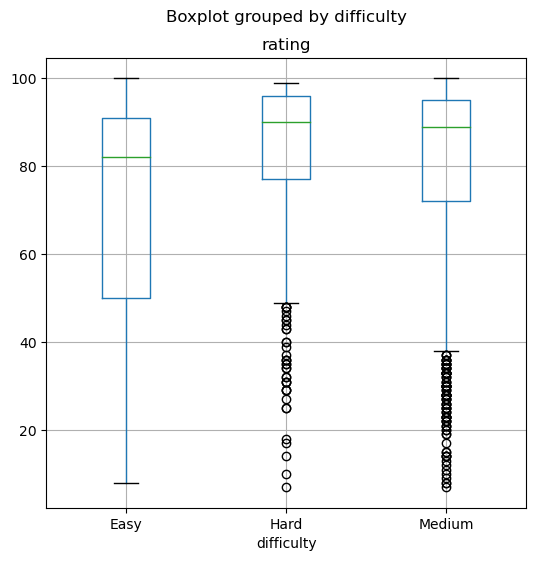

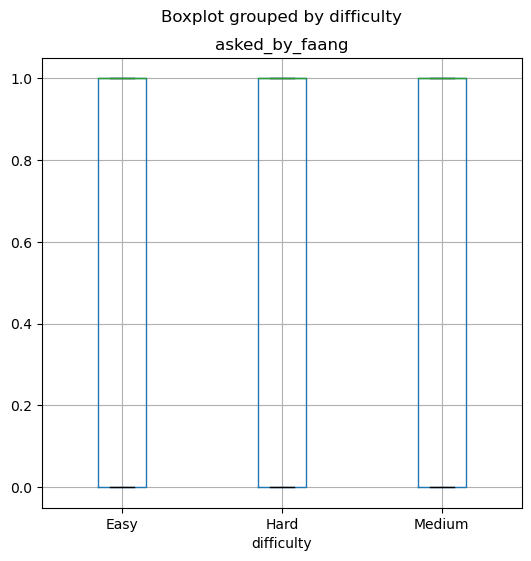

In [34]:
features = ['is_premium',	'acceptance_rate',	'frequency',	'discuss_count',	'likes',	'dislikes',	'rating',	'asked_by_faang']
for col in features:
    leetcode_data.boxplot(column=col, by='difficulty', figsize=(6,6))
    plt.title(col)
plt.show()

Here we have a distribution that shows, that easy problems has sufficient lower rating. And hard problems have a better rating.

In [35]:
import seaborn as sns

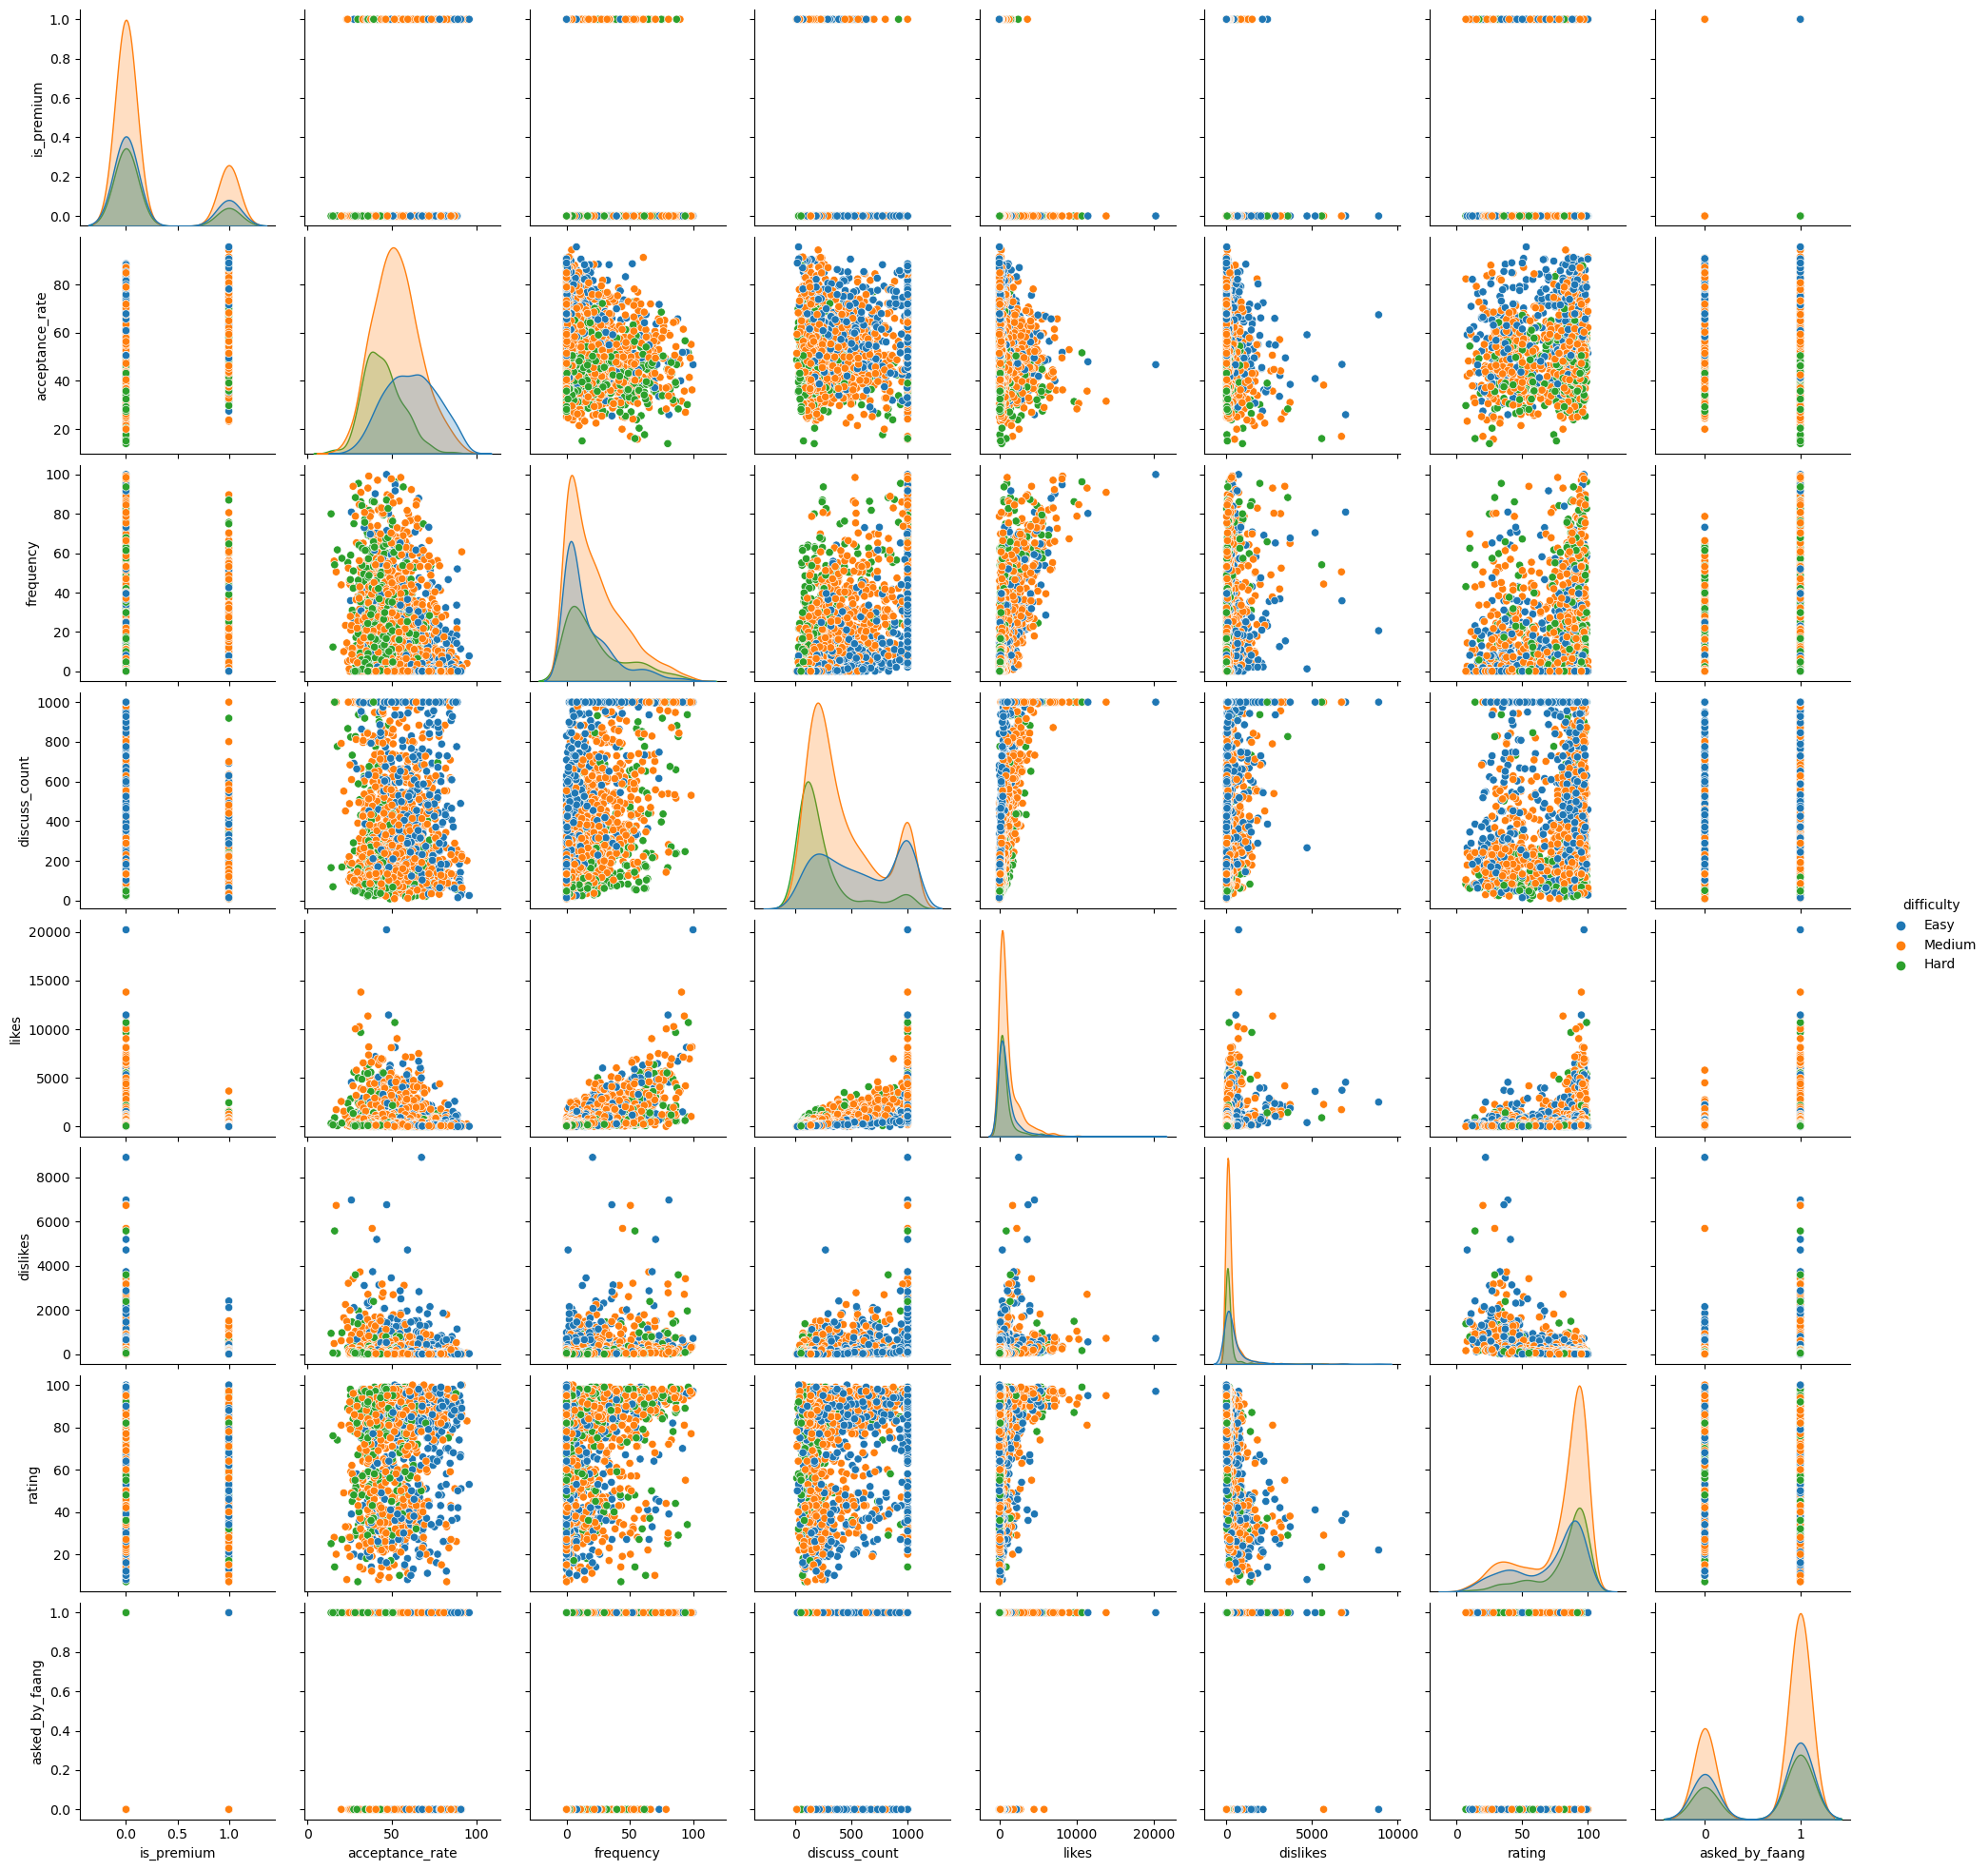

In [56]:
sns.pairplot(leetcode_data, hue="difficulty")

In [36]:
leetcode_data.corr().style.background_gradient(cmap='coolwarm')

/tmp/ipykernel_1211850/2781172900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  leetcode_data.corr().style.background_gradient(cmap='coolwarm')


,is_premium,acceptance_rate,frequency,discuss_count,likes,dislikes,rating,asked_by_faang
is_premium,1.000000,0.243377,-0.205241,-0.363184,-0.260686,-0.147680,-0.043871,-0.039971
acceptance_rate,0.243377,1.000000,-0.231853,0.019810,-0.164774,-0.179264,0.102832,-0.089183
frequency,-0.205241,-0.231853,1.000000,0.519824,0.646910,0.236260,0.136039,0.282584
discuss_count,-0.363184,0.019810,0.519824,1.000000,0.668338,0.307642,0.145977,0.277767
likes,-0.260686,-0.164774,0.646910,0.668338,1.000000,0.179362,0.268897,0.282941
dislikes,-0.147680,-0.179264,0.236260,0.307642,0.179362,1.000000,-0.516769,0.098759
rating,-0.043871,0.102832,0.136039,0.145977,0.268897,-0.516769,1.000000,0.085150
asked_by_faang,-0.039971,-0.089183,0.282584,0.277767,0.282941,0.098759,0.085150,1.000000


Correlation matrix shows us, that top tech companies mostly looking for a good developers, because they use problems with low acceptance_rate. Negative correlation between asked_by_faang and acceptance_rate.

### Key Findings and Insights

From summary statistics:
1. More than 75% of problems can be solved without premium subscription.
2. Near 50% of problems used in the interview process in such companies like Meta(Facebook), Apple, Amazon, Google, Netflix,…

From BoxPlots and distributions:

Top tech companies mostly looking for a good developers, because they use problems with low acceptance_rate. Negative correlation between asked_by_faang and acceptance_rate.

### So here is my hypotheses:

1.  H0: There is difference between the acceptance rate and  asked_by_faang.
      H1: There is no difference.
2.  H0: There is no difference between number of likes and number of dislikes.
      H1: More likes leads to more dislikes.
3.  H0: There is no difference between problem difficulty to appearance in the interview.
      H1: There is a some reason.

#### Testing first hypotheses:

In [37]:
asked=leetcode_data.loc[leetcode_data.asked_by_faang==1]
not_asked=leetcode_data.loc[leetcode_data.asked_by_faang==0]

In [38]:
a_r = asked.acceptance_rate
na_r = not_asked.acceptance_rate

/tmp/ipykernel_1211850/1551746250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a_r,color='green',hist=False)
/tmp/ipykernel_1211850/1551746250.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(na_r,color='red',hist=False)


<AxesSubplot: xlabel='acceptance_rate', ylabel='Density'>

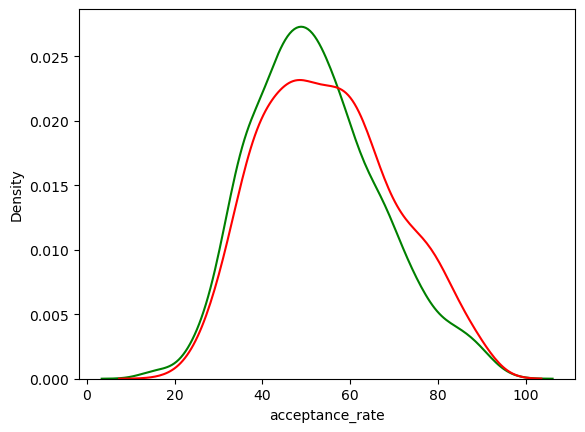

In [39]:
sns.distplot(a_r,color='green',hist=False)
sns.distplot(na_r,color='red',hist=False)

From the graph, we already see that the two distributions are very similar.

In [40]:
asked.acceptance_rate.mean()

52.2174693877551

In [41]:
not_asked.acceptance_rate.mean()

55.02233333333332

In [42]:
import scipy.stats as stats

Next, we will obtain our statistics, t-value and p-value. We will use scipy.stats library and ttest_ind() function to calculate these parameters.

In [43]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(a_r, na_r)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -3.8230610951797246 , p_value1 =  0.00013623337465378324


In [44]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis.")

Conclusion: since p_value 0.00013623337465378324 is less than alpha 0.05 
Reject the null hypothesis.


**Conclusion**: We fail to reject the null hypothesis and can conclude that there is no difference between the acceptance rate and  asked_by_faang.


**Suggestions for next steps in analyzing this data:**
For sure, there is some more ways to analyses this dataset. 
Most perspective is pairplots visualization. They can give additional information about feature relations.
Also, for future research, we can transform some object data types into numeric and check them.

**Summary:**
From developer and job looking perspective it’s a great dataset. It gave me an understanding of how to do EDA. I got some inside information such as companies that ask for a specific problem. You can get this information only if you have a subscription. 
As a suggestion for more data. I would add some additional columns for statistics on different programming languages.